In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix)
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.model_selection import KFold

In [2]:
X_train_top_scaled = np.load('../data/processed/X_train_top_scaled.npy')
X_test_top_scaled = np.load('../data/processed/X_test_top_scaled.npy')
y_class_train = np.load('../data/processed/y_class_train.npy')
y_class_test = np.load('../data/processed/y_class_test.npy')
y_reg_train = np.load('../data/processed/y_reg_train.npy')
y_reg_test = np.load('../data/processed/y_reg_test.npy')

Classification Models

Random Forest Classification

In [3]:
rf_clf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': [200],
    'max_depth': [25],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Randomized Search (tried grid search but compuntationally too intensive)
rf_random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_dist,
    n_iter=10,  # Number of parameter settings sampled (10 is typically a good start)
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train_top_scaled, y_class_train)


c:\Users\Larry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [25],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200]},
                   random_state=42, scoring='f1')


=== Random Forest ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 25, 'class_weight': None}
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4125
         1.0       0.88      0.81      0.85      4010

    accuracy                           0.85      8135
   macro avg       0.86      0.85      0.85      8135
weighted avg       0.86      0.85      0.85      8135

Accuracy: 0.8541


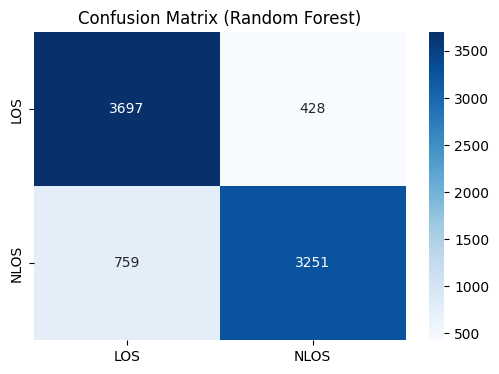

In [4]:
# Random Forest Classification Model & Evaluation
best_rf = rf_random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_top_scaled)

print("\n=== Random Forest ===")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(classification_report(y_class_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_class_test, y_pred_rf):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_rf), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['LOS', 'NLOS'], 
            yticklabels=['LOS', 'NLOS'])
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [5]:
# save the Random Forest model
joblib.dump(best_rf, '../models/best_rf_model.joblib')
print("Model saved successfully.")

Model saved successfully.


In [6]:
# # Note: Load the models when needed
# best_rf = joblib.load('random_forest_model.pkl')
# best_svm = joblib.load('svm_model.pkl')
# best_logreg = joblib.load('logistic_regression_model.pkl')

Support Vector Machine/ Classification

In [7]:
svc_clf = SVC(probability=True, random_state=42)
svc_param_grid = {
    'C': [0.1, 1, 10],                # Common values for regularization
    'kernel': ['rbf', 'linear'],      # Most commonly used kernels
    'gamma': ['scale', 'auto']        # Avoid too many gamma values
}

svm_random_search = RandomizedSearchCV(
    svc_clf,
    svc_param_grid,
    n_iter=1,  # Try 1 random combinations
    cv=3,  # Fewer folds for speed
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
svm_random_search.fit(X_train_top_scaled, y_class_train)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='f1')


=== SVM ===
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      4125
         1.0       0.90      0.79      0.84      4010

    accuracy                           0.85      8135
   macro avg       0.86      0.85      0.85      8135
weighted avg       0.86      0.85      0.85      8135

Accuracy: 0.8522


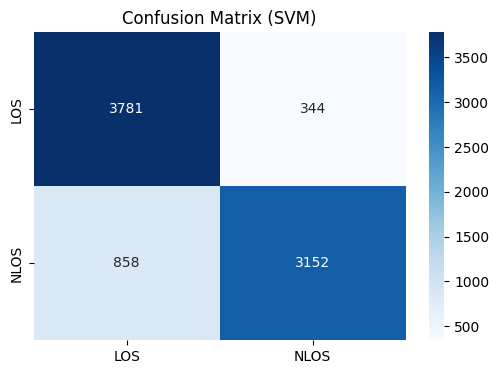

In [8]:
# Support Vector Machine/ Classification Model & Evaluation
best_svc = svm_random_search.best_estimator_
y_pred_svc = best_svc.predict(X_test_top_scaled)

print("\n=== SVM ===")
print(f"Best Parameters: {svm_random_search.best_params_}")
print(classification_report(y_class_test, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_class_test, y_pred_svc):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_svc), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['LOS', 'NLOS'], 
            yticklabels=['LOS', 'NLOS'])
plt.title('Confusion Matrix (SVM)')
plt.show()

In [9]:
# Save the Support Vector Machine/ Classification model
joblib.dump(best_svc, '../models/best_svc_model.joblib')
print("Model saved successfully.")

Model saved successfully.


Logistic Regression

In [10]:
# Model & Parameter Grid
logreg_clf = LogisticRegression(max_iter=1000, random_state=42)
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'saga']
}

# Grid Search
logreg_grid_search = GridSearchCV(
    logreg_clf,
    logreg_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1
)
logreg_grid_search.fit(X_train_scaled, y_class_train)

NameError: name 'X_train_scaled' is not defined


=== Logistic Regression ===
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      6188
         1.0       0.88      0.81      0.84      6015

    accuracy                           0.85     12203
   macro avg       0.85      0.85      0.85     12203
weighted avg       0.85      0.85      0.85     12203

Accuracy: 0.8519


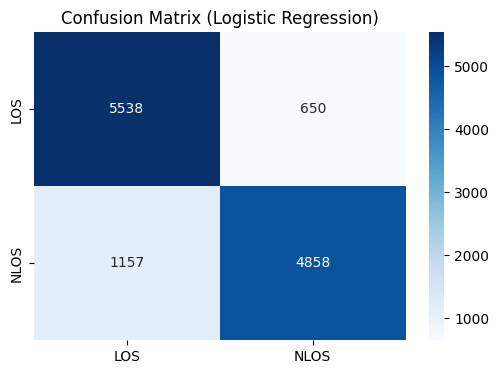

In [ ]:
# Logistic Regression Model & Evaluation
best_logreg = logreg_grid_search.best_estimator_
y_pred_logreg = best_logreg.predict(X_test_top_scaled)

print("\n=== Logistic Regression ===")
print(f"Best Parameters: {logreg_grid_search.best_params_}")
print(classification_report(y_class_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_class_test, y_pred_logreg):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_logreg), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['LOS', 'NLOS'], 
            yticklabels=['LOS', 'NLOS'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [ ]:
# save the Logistic Regression model
joblib.dump(best_logreg, '../models/best_logreg_model.joblib')
print("Model saved successfully.")

Model saved successfully.


Regression Models

Support Vector Machine/ Regressor

In [ ]:
svr_reg = SVR()
svr_param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'kernel': ['rbf', 'linear'],      # Most commonly used kernels
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

svr_random_search = RandomizedSearchCV(
    svr_reg,
    svr_param_grid,
    n_iter=10,  # Try 10 random combinations
    cv=KFold(n_splits=3, shuffle=True, random_state=42),  # Fewer folds for speed
    scoring='neg_mean_squared_error',  # Use MSE for regression
    n_jobs=-1,
    random_state=42
)
svr_random_search.fit(X_train_top_scaled, y_reg_train)

In [ ]:
# Support Vector Machine/ Regressor Model & Evaluation
best_svr = svr_random_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_top_scaled)

print("\n=== Support Vector Regressor (SVR) ===")
print(f"Best Parameters: {svr_random_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_pred_svr):.4f}")
print(f"R2 Score: {r2_score(y_reg_test, y_pred_svr):.4f}")

In [ ]:
# Save the Support Vector Machine/ Regressor model
joblib.dump(best_svr, 'svr_regressor.pkl')

Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_param_grid = {
    'fit_intercept': [True, False],   # Whether to calculate the intercept
    'positive': [True, False]        # Force coefficients to be positive
}

linear_random_search = RandomizedSearchCV(
    linear_reg,
    linear_param_grid,
    n_iter=10,  # Try 10 random combinations
    cv=KFold(n_splits=3, shuffle=True, random_state=42),  # Fewer folds for speed
    scoring='neg_mean_squared_error',  # Use MSE for regression
    n_jobs=-1,
    random_state=42
)
linear_random_search.fit(X_train_top_scaled, y_reg_train)

In [ ]:
# Linear Regressor Model & Evaluation
best_linear = linear_random_search.best_estimator_
y_pred_linear = best_linear.predict(X_test_top_scaled)

print("\n=== Linear Regression ===")
print(f"Best Parameters: {linear_random_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_pred_linear):.4f}")
print(f"R2 Score: {r2_score(y_reg_test, y_pred_linear):.4f}")


In [ ]:
# Save the Linear Regressor model
joblib.dump(best_linear, 'linear_regression.pkl')